In [1]:
import os
import pandas as pd
from ModularCirc import BatchRunner
import torch
import matplotlib.pyplot as plt
from autoemulate.core.types import TensorLike


from comparative_gsa.utils import helpers
figsize = (9, 5)

# Load the necessary files

In [2]:
param_filename = 'parameters_naghavi_constrained_fixed_T_v_tot_v_ref_lower_k_pas'

n_samples_simulations = 245760

simulation_out_path = f'../outputs/simulations/output_{n_samples_simulations}_samples_{param_filename}/'

output_to_emulate = 'p_ao_max'

n_samples_emulator = 2048
emulators_path = os.path.join(f'../outputs/simulations/output_{n_samples_emulator}_samples_{param_filename}', 
                              'emulators',
                              output_to_emulate)

parameters_json_file = os.path.join(os.path.join(f'../outputs/simulations/output_{n_samples_emulator}_samples_{param_filename}'), 'parameters.json')


In [3]:
# Load the simulation input parameters
input_params = pd.read_csv(os.path.join(simulation_out_path, f'input_samples_{n_samples_simulations}.csv'))

# Load the summary statistics
summary_stats = pd.read_csv(os.path.join(simulation_out_path, f'simulations_summary.csv'))

# Load the trained emulator
if output_to_emulate == 'p_ao_max':
    ae_results = helpers.ae_load_result(os.path.join(emulators_path, 'MLP_0_20250820_160858'))
elif output_to_emulate == 'p_la_max':
    ae_results = helpers.ae_load_result(os.path.join(emulators_path, 'MLP_0_20250820_162654'))

In [4]:
ae_results.metadata_df()

,id,model_name,x_transforms,y_transforms,params,r2_test,rmse_test,r2_test_std,rmse_test_std,r2_train,rmse_train,r2_train_std,rmse_train_std
0,0,MLP,[StandardizeTransform()],[StandardizeTransform()],"{'epochs': 200, 'layer_dims': [64, 32, 16], 'l...",0.997068,2.074748,0.000241,0.049734,0.997414,2.025449,0.000096,0.025371


In [5]:
# Use ModularCirc's BatchRunner to condense parameter names. This requires setting up the sampler first.
br = BatchRunner()

br.setup_sampler(parameters_json_file)

br._parameters_2_sample

{'ao.r': (195.0, 325.0),
 'ao.c': (0.22499999999999998, 0.375),
 'art.r': (843.75, 1406.25),
 'art.c': (2.25, 3.75),
 'ven.r': (6.75, 11.25),
 'ven.c': (84.975, 141.625),
 'av.r': (4.5, 7.5),
 'mv.r': (3.0749999999999997, 5.125),
 'la.E_pas': (0.22499999999999998, 0.375),
 'la.E_act': (0.41250000000000003, 0.6875),
 'la.k_pas': (0.00666, 0.03),
 'lv.E_pas': (0.75, 1.25),
 'lv.E_act': (2.25, 3.75),
 'lv.k_pas': (0.00666, 0.03)}

In [6]:
# Get column names for parameters up to 'lv.k_pas'
parameter_names = list(input_params.columns[:input_params.columns.get_loc('lv.k_pas') + 1])

input_params[parameter_names]

,ao.r,ao.c,art.r,art.c,ven.r,ven.c,av.r,mv.r,la.E_pas,la.E_act,la.k_pas,lv.E_pas,lv.E_act,lv.k_pas
0,195.023804,0.264999,986.469306,3.445404,9.936859,99.562789,4.898254,4.734494,0.309952,0.523497,0.019001,1.017975,3.399445,0.022708
1,238.314818,0.264999,986.469306,3.445404,9.936859,99.562789,4.898254,4.734494,0.309952,0.523497,0.019001,1.017975,3.399445,0.022708
2,195.023804,0.304147,986.469306,3.445404,9.936859,99.562789,4.898254,4.734494,0.309952,0.523497,0.019001,1.017975,3.399445,0.022708
3,195.023804,0.264999,1251.033795,3.445404,9.936859,99.562789,4.898254,4.734494,0.309952,0.523497,0.019001,1.017975,3.399445,0.022708
4,195.023804,0.264999,986.469306,2.801239,9.936859,99.562789,4.898254,4.734494,0.309952,0.523497,0.019001,1.017975,3.399445,0.022708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245755,252.771605,0.325040,1221.576705,2.736237,8.260895,116.532892,5.517517,4.642404,0.292355,0.553004,0.025517,0.890167,2.491791,0.013972
245756,252.771605,0.325040,1221.576705,2.736237,8.260895,116.532892,5.517517,4.642404,0.292355,0.553004,0.007576,1.138886,2.491791,0.013972
245757,252.771605,0.325040,1221.576705,2.736237,8.260895,116.532892,5.517517,4.642404,0.292355,0.553004,0.007576,0.890167,2.414887,0.013972
245758,252.771605,0.325040,1221.576705,2.736237,8.260895,116.532892,5.517517,4.642404,0.292355,0.553004,0.007576,0.890167,2.491791,0.013958


In [7]:
Y = summary_stats[output_to_emulate].values

In [8]:
# saltelli_samples_path = '../outputs/simulations/output_245760_samples_parameters_naghavi_constrained_fixed_T_v_tot_v_ref_lower_k_pas/saltelli_samples.csv'
# input_params = pd.read_csv(saltelli_samples_path)


In [9]:
# Turn x into a pytorch tensor
x = torch.tensor(input_params[parameter_names].values, dtype=torch.float32)

# Do the same with Y
y = torch.tensor(Y, dtype=torch.float32)

In [10]:
print(x.shape, y.shape)

torch.Size([245760, 14]) torch.Size([245760])


In [11]:
# Use the input file to predict with the emulator
y_pred = ae_results.model.predict(x)

In [12]:
isinstance(y_pred, TensorLike)

True

In [13]:
# Turning the y_pred into numpy
y_pred_np = y_pred.detach().cpu().numpy()

# Do the plots

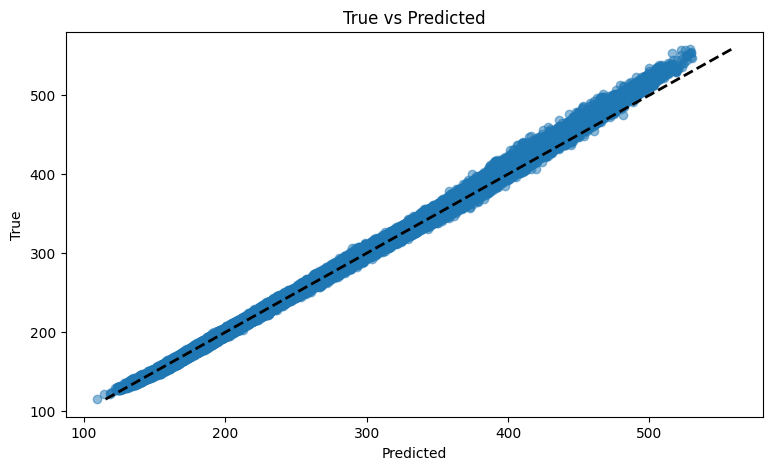

In [14]:
# Plot Y against y_pred
plt.figure(figsize=figsize)
plt.scatter(y_pred_np, Y, alpha=0.5)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('True vs Predicted')
plt.show()